### open api로 데이터 불러오기

In [103]:
import requests
import pandas as pd

# URL과 파라미터 정의
url = "http://www.kamis.or.kr/service/price/xml.do?action=periodProductList"

params = {
    "p_cert_key": "20f546f2-715d-4524-89ae-f933d5460bb9",   # 실제 인증 키로 대체
    "p_cert_id": "dkgus731",     # 실제 요청 ID로 대체
    "p_returntype": "json",          # json 또는 xml로 설정
    "p_startday": "2003-06-01",      # 조회 시작 날짜 설정
    "p_endday": "2024-06-24",        # 조회 종료 날짜 설정
    "p_convert_kg_yn": "Y",          # kg 단위 환산 여부 (Y 또는 N)
    "p_itemcategorycode": "100",     # 부류 코드 설정
    "p_itemcode": "151",             # 품목 코드 설정
    "p_kindcode": "00",              # 품종 코드 설정
    "p_productrankcode": "04",       # 등급 코드 설정
    "p_countrycode": "",             # 지역 코드 설정
    "p_productclscode": "02"           # 구분 ( 01:소매, 02:도매, default:02 )
}

# GET 요청 보내기
response = requests.get(url, params=params)

# 요청이 성공했는지 확인
if response.status_code == 200:
    # 응답을 파싱 (json 형식일 경우)
    data = response.json()
    
    # 'item' 리스트를 데이터프레임으로 변환
    items = data.get('data', {}).get('item', [])
    df = pd.DataFrame(items)
    
    # 데이터프레임 전체 출력 설정
    pd.set_option('display.max_rows', None)   # 모든 행 출력
    pd.set_option('display.max_columns', None) # 모든 열 출력
    pd.set_option('display.width', None)      # 가로 너비 설정 없음
    pd.set_option('display.max_colwidth', None) # 컬럼 최대 너비 설정 없음
    
    # 데이터프레임 출력
    print(df)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

     itemname kindname countyname marketname  yyyy regday  price
0          []       []         평균         []  2023  06/26  3,990
1          []       []         평균         []  2023  06/27  3,990
2          []       []         평균         []  2023  06/28  3,990
3          []       []         평균         []  2023  06/29  4,018
4          []       []         평균         []  2023  06/30  3,998
5          []       []         평균         []  2023  07/03  3,870
6          []       []         평균         []  2023  07/04  3,764
7          []       []         평균         []  2023  07/05  3,764
8          []       []         평균         []  2023  07/06  3,744
9          []       []         평균         []  2023  07/07  3,764
10         []       []         평균         []  2023  07/10  3,664
11         []       []         평균         []  2023  07/11  3,684
12         []       []         평균         []  2023  07/12  3,612
13         []       []         평균         []  2023  07/13  3,612
14         []       []   

In [104]:
new_df = df[df['countyname'] == '평년']

### 데이터 전처리

float 형식으로 바꾸기 위해 ',' 없애고 type 변경

In [105]:
new_df['price'] = new_df['price'].str.replace(',', '').astype(float)

C:\Users\CAU\AppData\Local\Temp\ipykernel_23072\4172125139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df['price'].str.replace(',', '').astype(float)


In [106]:
import pandas as pd

# regday 열에서 '/' 지우기
new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)

C:\Users\CAU\AppData\Local\Temp\ipykernel_23072\1408818617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['regday'] = new_df['regday'].str.replace('/', '').astype(str)


In [107]:
# yyyy와 regday 열을 합쳐서 새로운 date 열 생성
new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
new_df['date'] = pd.to_datetime(new_df['date'])

C:\Users\CAU\AppData\Local\Temp\ipykernel_23072\247695081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = new_df['yyyy'].astype(str) + new_df['regday'].astype(str)
C:\Users\CAU\AppData\Local\Temp\ipykernel_23072\247695081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])


In [108]:
#기존 yyyy, regday 열 삭제
new_df = new_df.drop(['yyyy', 'regday'], axis=1)

In [109]:
new_df.head()

,itemname,kindname,countyname,marketname,price,date
244,[],[],평년,[],3852.0,2023-05-02
245,[],[],평년,[],3892.0,2023-05-03
246,[],[],평년,[],3960.0,2023-05-07
247,[],[],평년,[],3992.0,2023-05-08
248,[],[],평년,[],3990.0,2023-05-09


In [110]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 244 to 487
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   itemname    244 non-null    object        
 1   kindname    244 non-null    object        
 2   countyname  244 non-null    object        
 3   marketname  244 non-null    object        
 4   price       244 non-null    float64       
 5   date        244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 13.3+ KB


### 모델링

In [111]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

시계열 데이터 처리

In [112]:
# 시간 정보 처리
new_df['date'] = pd.to_datetime(new_df['date'])
new_df = new_df.set_index('date')

# 과거 가격 데이터 생성 (lag 변수)
for i in range(1, 4):
    x = new_df[f'lag_{i}'] = new_df['price'].shift(i)
    
# 훈련/테스트 데이터 분할
y = new_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

최적의 하이퍼파라미터를 찾기 위해 그리드서치 진행

In [113]:
from sklearn.model_selection import GridSearchCV

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.2]
}

# XGBoost 모델 생성
model = XGBRegressor(objective='reg:squarederror')

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)

# 학습 및 최적 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print('Best Parameters:', grid_search.best_params_)

# 테스트 데이터로 모델 평가
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
MSE: 5245.2739
MAE: 59.8782


In [114]:
# XGBoost 모델 학습
model = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=2, learning_rate=0.1)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

MSE: 5245.2739
MAE: 59.8782
R-squared: 0.7712


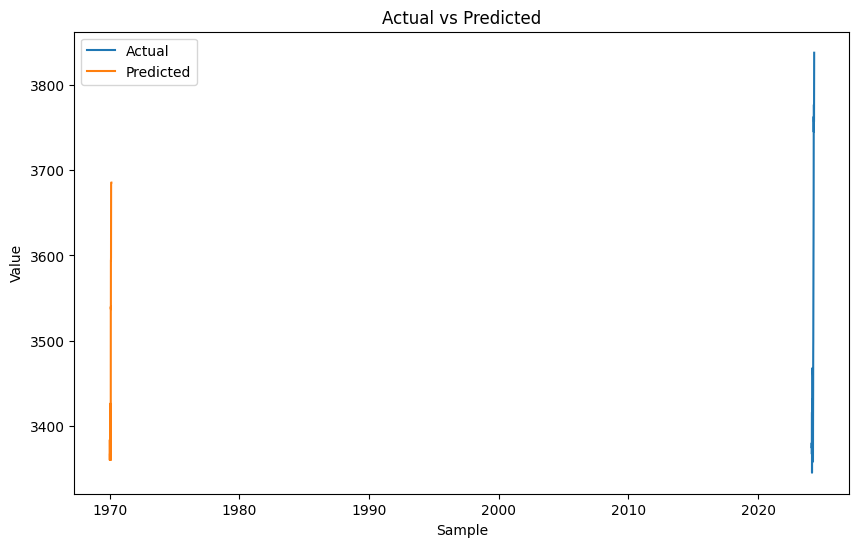

In [115]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 비교 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()